# U.S. UFO Sightings
---

### Analysis - Length of Encounter by Region

- This analysis comes from the clean version of our UFO Data, which includes filtering to only those sightings within the United States. This analysis examines the average length of a UFO encounter in the U.S., separated into five major regions.

-- Hypothesis:

Null - there will be no difference in the average length of an encounter between the southwest region and any other U.S. region / Alt - the southwest region will have significantly shorter average lengths of encounters than other U.S. regions.

-- Conclusions:

#1 There is no difference in the average length of encounter between the northeast region of the U.S., the southeast region, and west region. Supporting Ttests: NE v SE, NE v W, SE v W.

#2 The average length of encounters for the middle west region is statistically significantly greater than the average length of counters in any of the other four regions. Supporting Ttests: MW v NE, MW v SW, MW v SW, MW v W

#3 And further, the evidence supports that the southwest region of the U.S. has a statistically signifcantly shorter average length of encounter than any of the other four regions. Supporting Ttests: SW v MW, SW v NE, SW v SE, SW v W

In [64]:
import requests
# from config_weather_api_key import api_key
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import json
import time
import hvplot.pandas
import scipy.stats as stats
from scipy.stats import linregress

# Turn off warning messages
import warnings
warnings.filterwarnings("ignore")

In [65]:
# Read the clean CSV file
df = pd.read_csv("../Data/clean_UFO.csv")

#View the first 5 rows 
df.head()

,Date_time,city,state/province,country,UFO_shape,length_of_encounter_seconds,description,latitude,longitude,year,month,is_weekend
0,1949-10-10 20:30:00,san marcos,tx,us,cylinder,2700.0,This event took place in early fall around 194...,29.883056,-97.941111,1949,10,False
1,1956-10-10 21:00:00,edna,tx,us,circle,20.0,My older brother and twin sister were leaving ...,28.978333,-96.645833,1956,10,False
2,1960-10-10 20:00:00,kaneohe,hi,us,light,900.0,AS a Marine 1st Lt. flying an FJ4B fighter/att...,21.418056,-157.803611,1960,10,False
3,1961-10-10 19:00:00,bristol,tn,us,sphere,300.0,My father is now 89 my brother 52 the girl wit...,36.595000,-82.188889,1961,10,False
4,1965-10-10 23:45:00,norwalk,ct,us,disk,1200.0,A bright orange color changing to reddish colo...,41.117500,-73.408333,1965,10,True


In [66]:
df.nunique()

Date_time                      55652
city                           11235
state/province                    52
country                            1
UFO_shape                         19
length_of_encounter_seconds      460
description                    63321
latitude                       11495
longitude                      12293
year                              83
month                             12
is_weekend                         2
dtype: int64

In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63553 entries, 0 to 63552
Data columns (total 12 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Date_time                    63553 non-null  object 
 1   city                         63553 non-null  object 
 2   state/province               63553 non-null  object 
 3   country                      63553 non-null  object 
 4   UFO_shape                    63553 non-null  object 
 5   length_of_encounter_seconds  63553 non-null  float64
 6   description                  63553 non-null  object 
 7   latitude                     63553 non-null  float64
 8   longitude                    63553 non-null  float64
 9   year                         63553 non-null  int64  
 10  month                        63553 non-null  int64  
 11  is_weekend                   63553 non-null  bool   
dtypes: bool(1), float64(3), int64(2), object(6)
memory usage: 5.4+ MB


In [68]:
# sort the entire dataframe by 'year', then 'month'
df.sort_values(by=["year", "month"], inplace=True)
df.head(50)

,Date_time,city,state/province,country,UFO_shape,length_of_encounter_seconds,description,latitude,longitude,year,month,is_weekend
8670,1910-01-01 00:00:00,kirksville (near),mo,us,disk,120.0,Historical sighting (1903 - 1913) Northern Mis...,40.194722,-92.583056,1910,1,True
37344,1910-06-01 15:00:00,wills point,tx,us,cigar,120.0,Cigar shaped object moving from West to East,32.709167,-96.008056,1910,6,False
37224,1920-06-11 21:00:00,cicero,in,us,other,60.0,((NUFORC Note: Probable hoax. Note date. PD...,40.123889,-86.013333,1920,6,False
16966,1925-12-28 18:00:00,atkinson (6 miles north of),il,us,disk,60.0,Young boy witnesses disc in sky above Illinois...,41.420833,-90.015000,1925,12,False
49750,1929-07-05 14:00:00,buchanan (or burns),or,us,disk,60.0,we were traveling east of burns&#44clmbing up ...,43.642500,-118.627500,1929,7,False
21400,1931-02-15 14:00:00,holyoke (6-8 miles southwest of),co,us,oval,60.0,In the winter of 1931&#44 I saw a flying machi...,40.584444,-102.301944,1931,2,True
37345,1931-06-01 13:00:00,abilene,ks,us,disk,1800.0,This is a what my mother related to me regardi...,38.917222,-97.213611,1931,6,False
58901,1934-09-15 15:30:00,valley city (6.5 miles east of),nd,us,disk,5.0,Two brothers observe&#44 hear&#44 three black ...,46.923333,-98.002778,1934,9,True
1380,1936-10-15 17:00:00,eklutna,ak,us,cigar,180.0,Two men approached by a cigar-shaped object in...,61.458056,-149.362222,1936,10,False
38619,1937-06-15 00:00:00,hubbard,or,us,cylinder,10.0,It had a bluish tint with what looked like a c...,45.182500,-122.806667,1937,6,False


In [69]:
# define US region groupings, and make a new column for "region"
southwest = ['az','tx','nm','ok']
southeast = ['al','ar','la','ms','tn','ky','wv','va','nc','sc','ga','fl']
northeast = ['me','nh','vt','ma','md','ri','ct','nj','de','pa','ny']
middle_west = ['nd','sd','ne','ks','mn','ia','mo','wi','il','mi','in','oh']
west = ['wa', 'mt', 'or', 'id', 'wy', 'co', 'nm', 'ca', 'az', 'nv', 'ut', 'ak', 'hi']
df["region"] = None

df.loc[df["state/province"].isin(southwest), "region"] = "Southwest"
df.loc[df["state/province"].isin(southeast), "region"] = "Southeast"
df.loc[df["state/province"].isin(northeast), "region"] = "Northeast"
df.loc[df["state/province"].isin(middle_west), "region"] = "Middle West"
df.loc[df["state/province"].isin(west), "region"] = "West"
df.head()

,Date_time,city,state/province,country,UFO_shape,length_of_encounter_seconds,description,latitude,longitude,year,month,is_weekend,region
8670,1910-01-01 00:00:00,kirksville (near),mo,us,disk,120.0,Historical sighting (1903 - 1913) Northern Mis...,40.194722,-92.583056,1910,1,True,Middle West
37344,1910-06-01 15:00:00,wills point,tx,us,cigar,120.0,Cigar shaped object moving from West to East,32.709167,-96.008056,1910,6,False,Southwest
37224,1920-06-11 21:00:00,cicero,in,us,other,60.0,((NUFORC Note: Probable hoax. Note date. PD...,40.123889,-86.013333,1920,6,False,Middle West
16966,1925-12-28 18:00:00,atkinson (6 miles north of),il,us,disk,60.0,Young boy witnesses disc in sky above Illinois...,41.420833,-90.015000,1925,12,False,Middle West
49750,1929-07-05 14:00:00,buchanan (or burns),or,us,disk,60.0,we were traveling east of burns&#44clmbing up ...,43.642500,-118.627500,1929,7,False,West


In [70]:
# look at number of sightings per region
df.region.value_counts()

West           21591
Southeast      13439
Middle West    13320
Northeast      11060
Southwest       4112
Name: region, dtype: int64

In [71]:
df.head()

,Date_time,city,state/province,country,UFO_shape,length_of_encounter_seconds,description,latitude,longitude,year,month,is_weekend,region
8670,1910-01-01 00:00:00,kirksville (near),mo,us,disk,120.0,Historical sighting (1903 - 1913) Northern Mis...,40.194722,-92.583056,1910,1,True,Middle West
37344,1910-06-01 15:00:00,wills point,tx,us,cigar,120.0,Cigar shaped object moving from West to East,32.709167,-96.008056,1910,6,False,Southwest
37224,1920-06-11 21:00:00,cicero,in,us,other,60.0,((NUFORC Note: Probable hoax. Note date. PD...,40.123889,-86.013333,1920,6,False,Middle West
16966,1925-12-28 18:00:00,atkinson (6 miles north of),il,us,disk,60.0,Young boy witnesses disc in sky above Illinois...,41.420833,-90.015000,1925,12,False,Middle West
49750,1929-07-05 14:00:00,buchanan (or burns),or,us,disk,60.0,we were traveling east of burns&#44clmbing up ...,43.642500,-118.627500,1929,7,False,West


In [72]:
# average length of encounters in seconds, by region
df.groupby("region").length_of_encounter_seconds.mean()

region
Middle West     1437.292950
Northeast       3056.298693
Southeast      12541.125906
Southwest       2261.029073
West            5579.569804
Name: length_of_encounter_seconds, dtype: float64

In [73]:
# variance of length of encounters in seconds, by region
df.groupby("region").length_of_encounter_seconds.var()

region
Middle West    6.951638e+08
Northeast      8.514503e+09
Southeast      5.506051e+11
Southwest      3.350648e+09
West           1.384339e+11
Name: length_of_encounter_seconds, dtype: float64

In [74]:
# standard variation of length of encounters in seconds, by region
df.groupby("region").length_of_encounter_seconds.std()

region
Middle West     26365.958491
Northeast       92274.063384
Southeast      742027.726784
Southwest       57884.784927
West           372067.077164
Name: length_of_encounter_seconds, dtype: float64

<Axes: >

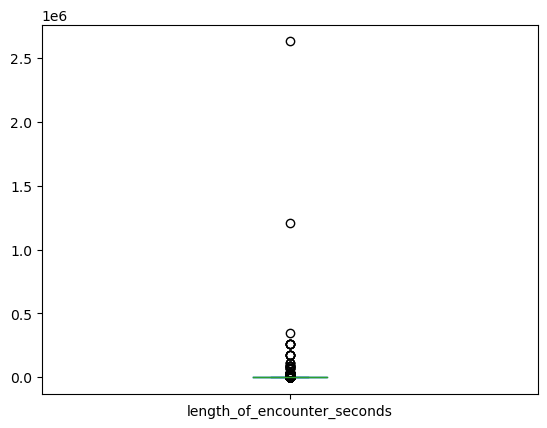

In [75]:
# length_of_encounter_seconds box plot to visualize outliers
df.loc[df.region == "Middle West", "length_of_encounter_seconds"].plot(kind="box")

In [76]:
# filter encounters to only those less than 600 seconds (10 minutes)
sub=df.loc[df.length_of_encounter_seconds <= 600]

In [77]:
# choose two regions to compare by t-test
region_mw = sub.loc[sub.region == "Middle West", "length_of_encounter_seconds"].values
region_se = sub.loc[sub.region == "Southeast", "length_of_encounter_seconds"].values
region_ne = sub.loc[sub.region == "Northeast", "length_of_encounter_seconds"].values
region_sw = sub.loc[sub.region == "Southwest", "length_of_encounter_seconds"].values
region_w = sub.loc[sub.region == "West", "length_of_encounter_seconds"].values

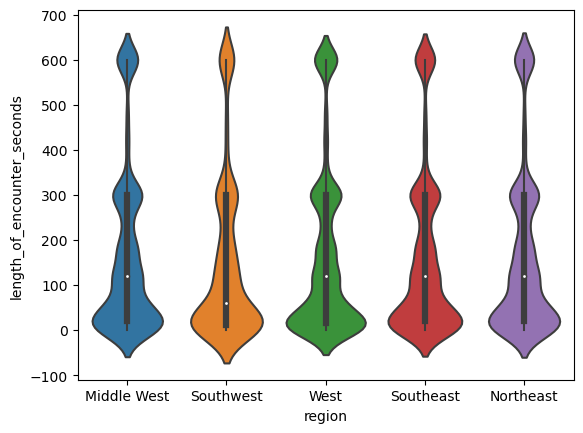

In [78]:
# violin plot to again visualize potential outliers
sns.violinplot(data=sub, x="region", y="length_of_encounter_seconds")
# save the violin chart
plt.savefig("length_of_encounter_violin.png")

In [79]:
# aggregate our length_of_encounter_seconds by region
sub.groupby("region").agg({"length_of_encounter_seconds": ["size", "mean", "var"]})

length_of_encounter_seconds                          
                                   size        mean           var
region                                                           
Middle West                       10292  173.890507  34726.172318
Northeast                          8644  169.188055  33742.242585
Southeast                         10458  168.054413  33629.826962
Southwest                          3165  154.832401  33478.379545
West                              16545  170.382329  35557.287461

In [80]:
# Ttest NE v SE (conclusion #1)
stats.ttest_ind(region_ne, region_se, equal_var=False)

Ttest_indResult(statistic=0.4248728795333055, pvalue=0.6709343093108562)

In [81]:
# Ttest NE v W (conclusion #1)
stats.ttest_ind(region_ne, region_w, equal_var=False)

Ttest_indResult(statistic=-0.48543408675393457, pvalue=0.627374386090834)

In [82]:
# Ttest SW v W (conclusion #1)
stats.ttest_ind(region_se, region_w, equal_var=False)

Ttest_indResult(statistic=-1.005053853017604, pvalue=0.31488163362871285)

In [83]:
# Ttest MW v NE (conclusion #2)
stats.ttest_ind(region_mw, region_ne, equal_var=True)

Ttest_indResult(statistic=1.7409485194718775, pvalue=0.08170884607838126)

In [84]:
# Ttest MW v SE (conclusion #2)
stats.ttest_ind(region_mw, region_se, equal_var=True)

Ttest_indResult(statistic=2.2737462922464458, pvalue=0.02299141506658368)

In [85]:
# Ttest MW v SW (conclusion #2)
stats.ttest_ind(region_mw, region_sw, equal_var=True)

Ttest_indResult(statistic=5.053083914347702, pvalue=4.4043547406793806e-07)

In [86]:
# Ttest MW v W (conclusion #2)
stats.ttest_ind(region_mw, region_w, equal_var=True)

Ttest_indResult(statistic=1.4886372205631462, pvalue=0.1365946759088528)

In [87]:
# Ttest SW v MW
stats.ttest_ind(region_sw, region_mw, equal_var=False)

Ttest_indResult(statistic=-5.1022873672941875, pvalue=3.471916559922397e-07)

In [88]:
# Ttest SW vs NE
stats.ttest_ind(region_sw, region_ne, equal_var=False)

Ttest_indResult(statistic=-3.7724216412004203, pvalue=0.00016332477394376393)

In [89]:
# Ttest SW vs SE
stats.ttest_ind(region_sw, region_se, equal_var=False)

Ttest_indResult(statistic=-3.5600985347279277, pvalue=0.00037400782422458896)

In [90]:
# Ttest SW vs W
stats.ttest_ind(region_sw, region_w, equal_var=False)

Ttest_indResult(statistic=-4.358816029431936, pvalue=1.336567634583899e-05)

In [91]:
# look at the stats on our length of encounter data
df.length_of_encounter_seconds.describe()

count    6.355300e+04
mean     5.527375e+03
std      4.065878e+05
min      1.000000e-02
25%      3.000000e+01
50%      1.800000e+02
75%      6.000000e+02
max      6.627600e+07
Name: length_of_encounter_seconds, dtype: float64

In [92]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x_values, y_values, title, text_coordinates):
    
    # Compute linear regression
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
  
    # Plot
    plt.figure(figsize=(10,6))
    plt.scatter(x_values,y_values, color="limegreen")
    plt.plot(x_values,regress_values,color="midnightblue")
    plt.xlabel("Latitude")
    plt.ylabel(title)
    plt.title(f"The r-squared value is: {rvalue**2:.8f}")
    plt.savefig("regression_image.png")
    print(f"The r-squared value is: {rvalue**2:.8f}")
    plt.show()

The r-squared value is: 0.00000248


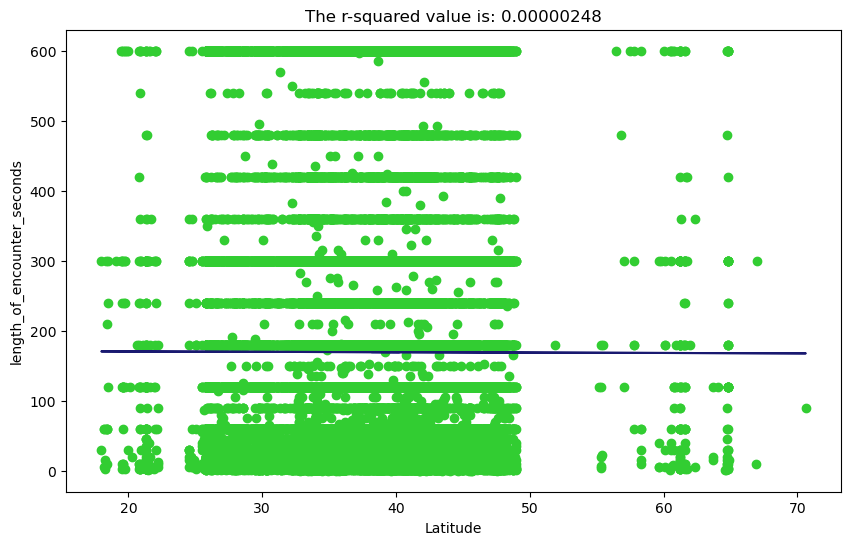

In [93]:
# regression: lat, lon, predict length of encounter
# Scatter Plot 1, lat on x, length of encounter on y
x_values = sub["latitude"]
y_values = sub["length_of_encounter_seconds"]
plot_linear_regression(x_values, y_values, "length_of_encounter_seconds", (0,0))

The r-squared value is: 0.00000075


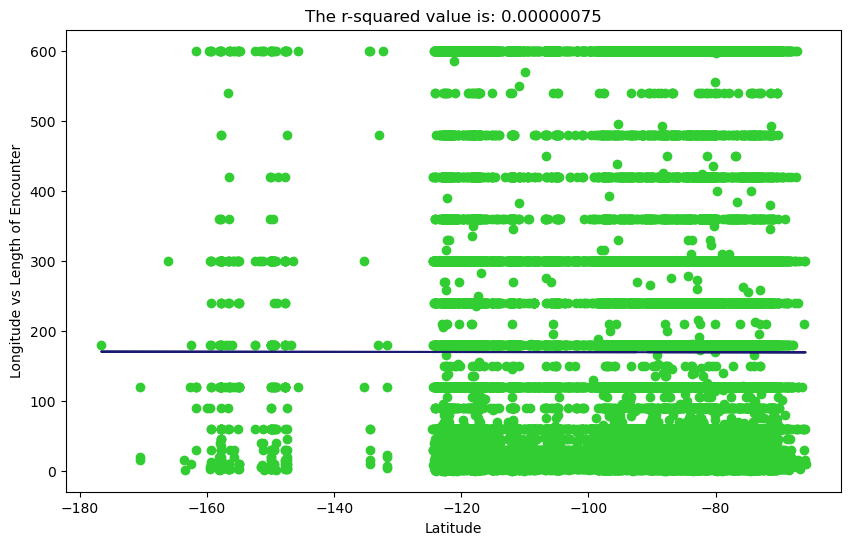

In [94]:
# regression: lat, lon, predict length of encounter
# Scatter Plot 2, long on x, length of encounter on y
x_values = sub["longitude"]
y_values = sub["length_of_encounter_seconds"]
plot_linear_regression(x_values, y_values, "Longitude vs Length of Encounter", (0,0))